<a href="https://colab.research.google.com/github/shushantarora009/MachineLearning/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
single_image = X_train[0]

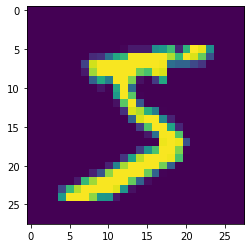

In [12]:
plt.imshow(single_image)

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_cat_train = to_categorical(y_train)

In [21]:
y_cat_train.shape

(60000, 10)

In [22]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
y_cat_test = to_categorical(y_test)

In [24]:
y_cat_test.shape

(10000, 10)

In [26]:
X_train = X_train/255

In [27]:
X_test = X_test/255

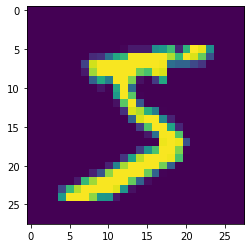

In [28]:
scaled_image = X_train[0]
plt.imshow(scaled_image)

In [29]:
X_train = X_train.reshape(60000,28,28,1)

In [31]:
X_test = X_test.reshape(10000,28,28,1)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [35]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (4,4),input_shape = (28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [36]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stopping = EarlyStopping(monitor = 'val_loss',patience = 1)

In [40]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0462 - accuracy: 0.9861 - val_loss: 0.0399 - val_accuracy: 0.9878
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0293 - accuracy: 0.9907 - val_loss: 0.0395 - val_accuracy: 0.9871
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0203 - accuracy: 0.9932 - val_loss: 0.0485 - val_accuracy: 0.9857


In [41]:
metrics = pd.DataFrame(model.history.history)

In [42]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.046199,0.986133,0.039867,0.9878
1,0.029280,0.990733,0.039465,0.9871
2,0.020250,0.993200,0.048475,0.9857


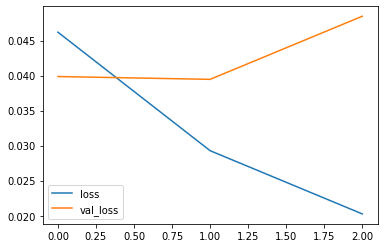

In [43]:
metrics[['loss','val_loss']].plot()

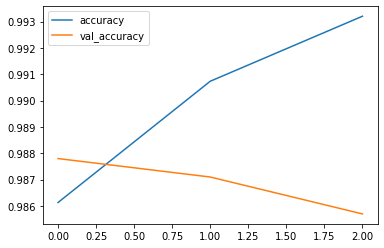

In [44]:
metrics[['accuracy','val_accuracy']].plot()

In [45]:
model.metrics_names

['loss', 'accuracy']

In [46]:
model.evaluate(X_test,y_cat_test,verbose=1)

313/313 [==============================] - 2s 7ms/step - loss: 0.0485 - accuracy: 0.9857


[0.04847538843750954, 0.9857000112533569]

In [47]:
from sklearn.metrics import confusion_matrix,classification_report


In [50]:
predictions = np.argmax(model.predict(X_test),axis=1)

In [51]:
predictions.shape

(10000,)

In [52]:
predictions[0]

7

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.96      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       1.00      0.95      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [54]:
confusion_matrix(y_test,predictions)

array([[ 972,    1,    1,    0,    0,    0,    3,    1,    2,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [   1,    2, 1019,    2,    0,    0,    1,    7,    0,    0],
       [   0,    0,    4, 1003,    0,    0,    0,    2,    1,    0],
       [   0,    0,    0,    0,  977,    0,    2,    1,    0,    2],
       [   0,    0,    0,   15,    0,  876,    1,    0,    0,    0],
       [   2,    1,    0,    1,    3,    7,  941,    0,    3,    0],
       [   0,    1,    5,    0,    0,    0,    0, 1021,    1,    0],
       [   2,    2,    4,    1,    3,    0,    0,    8,  952,    2],
       [   0,    5,    0,    3,   14,    1,    0,   20,    3,  963]])

In [55]:
import seaborn as sns

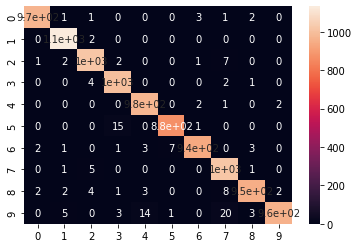

In [57]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [58]:
input_image = X_test[0]

In [59]:
input_image.shape

(28, 28, 1)

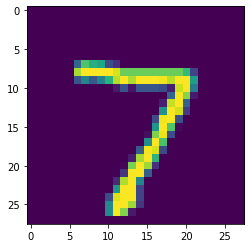

In [60]:
plt.imshow(input_image.reshape(28,28))

In [62]:
np.argmax(model.predict(input_image.reshape(1,28,28,1)),axis=1)

array([7])